# Chirality and Circular Dichroism in Quantum Chemistry


Chirality is a fundamental concept in molecular science, describing the property of molecules that are non-superimposable on their mirror images. These chiral structures are prevalent in nature and are central to biochemical processes, from DNA helices to amino acids. One of the most fascinating phenomena associated with chirality is circular dichroism (CD), which measures how chiral molecules interact differently with left- and right-circularly polarized light. CD spectra provide insights into the electronic and structural properties of chiral systems, making them indispensable in fields such as drug discovery, stereochemistry, and biomolecular research.

Simulating circular dichroism spectra is an essential tool for understanding chiral interactions at the quantum level. In quantum chemistry, these simulations involve calculating the electric and magnetic transition dipole moments that govern the differential absorption of polarized light. The subtle interplay between electronic transitions and molecular geometry creates the distinct CD signatures that are rich with structural information. Leveraging quantum computing to simulate CD spectra presents an exciting frontier, offering the potential to achieve unprecedented accuracy and scalability for systems that are computationally demanding for classical methods.

The interaction between chiral molecules and polarized light can be mapped using Hamiltonians that encode the light-matter coupling. By representing molecular states as qubits, quantum circuits can be constructed to simulate these interactions. Variational quantum algorithms (VQAs), combined with quantum feature mapping techniques, can optimize the states of these systems to extract CD spectral data. This allows researchers to explore chiral interactions beyond the reach of traditional computational approaches, delving into new realms of structural complexity.

One of the most intriguing aspects of CD simulation is its ability to probe the geometric and electronic asymmetry of chiral systems. With quantum computing, researchers can extend this to study transient phenomena, such as conformational changes or reaction intermediates, by simulating time-dependent chiral responses. This opens new possibilities for exploring dynamic systems with high temporal and spatial resolution, paving the way for breakthroughs in photochemistry and photophysics.

The quantum simulation of CD spectra is not merely a computational advancement—it is a gateway to understanding chirality at its most fundamental level. It can unlock pathways for designing chiral-specific drugs, developing enantioselective catalysts, and engineering chiral quantum materials. As the quantum computing community advances hardware and algorithmic capabilities, these simulations will undoubtedly become more practical and impactful.

By marrying the principles of chirality, quantum chemistry, and quantum computation, we stand at the intersection of innovation and discovery. The future holds the promise of unraveling the complexities of chiral interactions, leveraging the power of quantum algorithms to deepen our understanding of the molecular world. The synergy between chiral science and quantum technology is poised to redefine what is possible in molecular design and analysis.

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp, Operator, Statevector
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.primitives import Estimator
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Define constants
wavelength = 400e-9  # Wavelength of light in meters (example for UV light)
frequency = 3e8 / wavelength  # Frequency of light in Hz
omega = 2 * np.pi * frequency  # Angular frequency
g = 0.05  # Coupling strength (arbitrary units)

In [3]:
# Define the interaction Hamiltonians for left- and right-circularly polarized light
H_left = SparsePauliOp(["XX", "YY"], coeffs=[g, -g])  # Left-circular polarization
H_right = SparsePauliOp(["XX", "YY"], coeffs=[g, g])  # Right-circular polarization

In [4]:
# Define a two-qubit quantum circuit to represent the chiral molecule
qc = QuantumCircuit(2)
qc.h(0)  # Initialize qubit 0 in superposition
qc.x(1)  # Initialize qubit 1 in |1⟩ state (represents excited state)

In [5]:
# Initialize the simulator
simulator = AerSimulator()

In [6]:
# Define a function to calculate the absorption intensity
def calculate_absorption(hamiltonian, circuit, time_points):
    intensities = []
    for t in time_points:
        # Define the Pauli Evolution Gate for time evolution
        evolution_gate = PauliEvolutionGate(hamiltonian, time=t)
        U = Operator(evolution_gate).data  # Get the matrix representation of the evolution
        # Apply the evolution to the quantum state
        evolved_circuit = circuit.copy()
        evolved_circuit.unitary(U, [0, 1])  # Apply evolution on qubits 0 and 1
        evolved_circuit.save_statevector()  # Save the statevector to ensure it's accessible
        # Simulate the statevector
        result = simulator.run(evolved_circuit).result()
        statevector = result.data(0)["statevector"]  # Retrieve the saved statevector
        # Calculate absorption intensity (|<ψ|H|ψ>|^2)
        statevector_array = np.array(statevector)
        intensity = np.abs(statevector_array.conj().T @ hamiltonian.to_matrix() @ statevector_array)**2
        intensities.append(intensity)
    return intensities

In [7]:
# Simulate for a range of time points
time_points = np.linspace(0, 10, 100)  # Time points for simulation
absorption_left = calculate_absorption(H_left, qc, time_points)
absorption_right = calculate_absorption(H_right, qc, time_points)

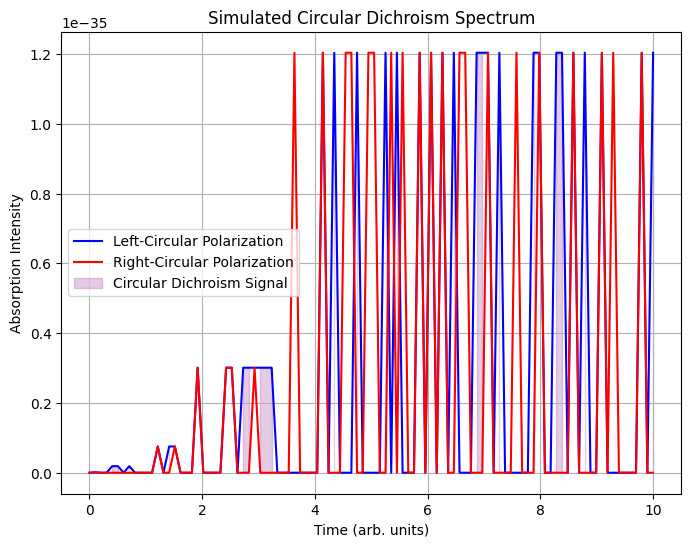

In [8]:
# Plot the Circular Dichroism (CD) spectrum
plt.figure(figsize=(8, 6))
plt.plot(time_points, absorption_left, label="Left-Circular Polarization", color="blue")
plt.plot(time_points, absorption_right, label="Right-Circular Polarization", color="red")
plt.fill_between(
    time_points,
    absorption_left,
    absorption_right,
    where=(np.array(absorption_left) > np.array(absorption_right)),
    color="purple",
    alpha=0.2,
    label="Circular Dichroism Signal",
)
plt.xlabel("Time (arb. units)")
plt.ylabel("Absorption Intensity")
plt.title("Simulated Circular Dichroism Spectrum")
plt.legend()
plt.grid()
plt.show()
